In [71]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 교차검증
from sklearn.model_selection import cross_validate

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from warnings import filterwarnings
filterwarnings('ignore')

## 앙상블 학습의 유형: 보팅(Voting), 배깅(Bagging), 부스팅(Boosting), 스태킹(Stacking) 등

## Voting
- 여러 종류의 알고리즘을 사용한 각각의 결과에 대해 투표를 통해 최종 결과를 예측하는 방식

In [52]:
bcancer = load_breast_cancer()

In [53]:
x_data = bcancer['data']
y_data = bcancer['target']

In [54]:
x_train, x_test, y_train, y_test = train_test_split(bcancer['data'], bcancer['target'], 
                                                    test_size = 0.2, random_state = 11, stratify=bcancer['target'])

In [80]:
# vote 모델 생성


model_logi = LogisticRegression()
model_knn = KNeighborsClassifier()
model_tree = DecisionTreeClassifier()

model_vote = VotingClassifier(estimators=[('LogisticRegression',model_logi), ('Knn',model_knn),
                                          ('Tree', model_tree)])
model_vote.fit(x_train, y_train)

# 교차검증을 해야함
cross_val = cross_validate(model_vote, x_train, y_train, cv=5)

In [47]:
# 예측값 (vote결과)
model_vote.predict(x_test)

array([0, 1, 1, 0, 1, 2, 0, 2, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 2, 2, 0,
       1, 2, 0, 1, 2, 2, 0, 1, 2, 1, 1, 0, 1, 2])

In [48]:
model_vote.score(x_test, y_test)

0.9166666666666666

In [49]:
## logi 결과값
model_logi.fit(x_train, y_train)

model_logi.predict(x_test)

array([0, 1, 1, 0, 1, 2, 0, 2, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 2, 2, 0,
       1, 1, 0, 1, 2, 2, 0, 1, 2, 1, 1, 0, 1, 2])

In [50]:
for c in [model_logi,model_knn,model_tree]:
    c.fit(x_train, y_train)
    print(c.__class__.__name__, c.score(x_test, y_test))

LogisticRegression 0.8888888888888888
KNeighborsClassifier 0.6388888888888888
DecisionTreeClassifier 0.9166666666666666


## 연습문제
- 3개의 분류 클래스를 이용하여 soft voting으로 정확도를 구하시요.

In [27]:
from sklearn.datasets import load_wine

In [28]:
wine = load_wine()

In [29]:
x_data = wine['data']
y_data = wine['target']

In [30]:
x_train, x_test, y_train, y_test = train_test_split(wine['data'], wine['target'], 
                                                    test_size = 0.2, random_state = 11, stratify=wine['target'])

In [62]:
# soft_vote 모델 생성
model_logi = LogisticRegression(multi_class='multinomial' )
model_knn = KNeighborsClassifier()
model_tree = DecisionTreeClassifier()

model_vote = VotingClassifier(estimators=[('LogisticRegression',model_logi), ('Knn',model_knn),
                                          ('Tree', model_tree)], voting='soft')
model_vote.fit(x_train, y_train)

VotingClassifier(estimators=[('LogisticRegression',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='multinomial',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('Knn',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=...
                              DecisionTreeClassifier(ccp_alpha=0.0,
                            

In [42]:
# 예측값 (vote결과)
model_vote.predict(x_test)

array([0, 1, 1, 0, 1, 2, 0, 2, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 2, 2, 0,
       1, 2, 0, 1, 2, 2, 0, 1, 2, 1, 1, 0, 1, 2])

In [44]:
y_test

array([0, 1, 1, 0, 1, 2, 0, 2, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 2, 2, 0,
       1, 2, 0, 1, 2, 2, 0, 0, 2, 1, 2, 0, 0, 2])

In [43]:
# score확인
model_vote.score(x_test, y_test)

0.9166666666666666

In [45]:
# DecisionTree 채택
for c in [model_logi,model_knn,model_tree]:
    c.fit(x_train, y_train)
    print(c.__class__.__name__, c.score(x_test, y_test))

LogisticRegression 0.8888888888888888
KNeighborsClassifier 0.6388888888888888
DecisionTreeClassifier 0.9166666666666666


In [ ]:
## 이 경우 hard voting 때는 Logi, soft voting에는 DecisionTree

## Bagging
- bagging은 bootstrap aggregating의 줄임말
- bootstrap:모집단의 성질에 대해 표본을 통해 추정할 수 있는 것처럼, 표본의 성질에 대해서도 재표집(resampling)을 통해 추정할 수 있다는 것이다. 즉 주어진 표본(샘플)에 대해서, 그 샘플에서 또 다시 샘플(재표본)을 여러번(1,000~10,000번, 혹은 그 이상)추출하여 표본의 평균이나 분산 등이 어떤 분포를 가지는가를 알아낼 수 있다.(위키피디아)
- 같은 알고리즘에 대해 데이터 샘플을 다르게 두고 학습을 수행해 보팅을 수행하는 방식
- 이 때의 데이터 샘플은 중첩이 허용된다. 즉 10000개의 데이터에 대해 10개의 알고리즘이 배깅을 사용할 때,각 1000개의 데이터 내에는 중복된 데이터가 존재할 수 있다. 배깅의 대표적인 방식이 Random Forest

In [93]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier 

In [94]:
model_pipe_knn = make_pipeline(StandardScaler(),KNeighborsClassifier())

In [99]:
# n_estimators 앙상블의 추정자 수
# bootstrap = True는 복원을 의미
# max_samples = 각 기본 추정량을 훈련하기 위해 X에서 추출할 샘플수

model_bagg = BaggingClassifier(base_estimator=model_pipe_knn, n_estimators=10,
                               bootstrap = True, max_samples = 0.5)
model_bagg.fit(x_train, y_train)

# 교차검증
model_cross = cross_validate(model_bagg, X=x_train, y=y_train, cv=50)


In [100]:
model_bagg.predict(x_test)

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0])

In [101]:
model_bagg.score(x_test, y_test)

0.956140350877193

In [102]:
model_cross['test_score'].mean()

0.9644444444444443

## Random Forest (결정나무 + bagging)

In [103]:
# n_estimators = 100 - 나무가 100개라는 뜻
forest = RandomForestClassifier()

In [104]:
forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [105]:
forest.predict(x_test)

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0])

In [107]:
forest.score(x_test, y_test)

0.956140350877193

## Boosting
- 여러 개의 알고리즘이 순차적으로 학습을 하되, 앞에 학습한 알고리즘 예측이 틀린 데이터에 대해 올바르게 예측할 수 있도록, 그 다음번 알고리즘에 가중치(Ada)를 부여하여 학습과 예측을 진행하는 방식 잔여오차를 다시 학습(greadient)


( 부스팅 알고리즘은 대표적으로 아래와 같은 알고리즘들이 있음)
- AdaBoost
- Gradient Booting Machine(GBM)
- XGBoost
- LightGBM
- CatBoost

In [108]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [112]:
tree = DecisionTreeClassifier(max_depth=1, criterion='entropy',
                              random_state=1)
model_ada = AdaBoostClassifier(base_estimator=tree)
model_ada.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                       

In [113]:
model_ada.predict(x_test)

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0])

In [114]:
model_ada.score(x_test, y_test)

0.956140350877193

### 연습
- iris 데이터 셋을 이용하여 logistic에 bagging과 boosting을 적용하여 정확도를 구하고 roc를 그리시오 (roc는 이진분류만 가능)

### 데이터 가져오기

In [177]:
from sklearn.utils.testing import all_estimators
from sklearn.datasets import load_breast_cancer
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

In [178]:
cancer = load_breast_cancer()

In [179]:
x_data = cancer['data']
y_data = cancer['target']

In [180]:
x_train, x_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], 
                                                    test_size = 0.2, random_state = 11, stratify=cancer['target'])

### 모델 생성

In [189]:
pipe_logi = make_pipeline(StandardScaler(),
                          LogisticRegression())

#### Bagging 적용

In [192]:
model_bagg = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=10,
                               bootstrap = True, max_samples = 0.5)
model_bagg.fit(x_train, y_train)

# 교차검증
model_cross = cross_validate(model_bagg, X=x_train, y=y_train, cv=5)

#### boosting 적용

In [193]:
# 파이프 라인을 사용할수 없음
model_ada = AdaBoostClassifier(base_estimator=model_bagg,
                               n_estimators=10)

model_ada.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=BaggingClassifier(base_estimator=LogisticRegression(C=1.0,
                                                                                      class_weight=None,
                                                                                      dual=False,
                                                                                      fit_intercept=True,
                                                                                      intercept_scaling=1,
                                                                                      l1_ratio=None,
                                                                                      max_iter=100,
                                                                                      multi_class='auto',
                                                                                      n_jobs=None,
                                             

In [184]:
model_ada.score(x_test, y_test)

0.9122807017543859

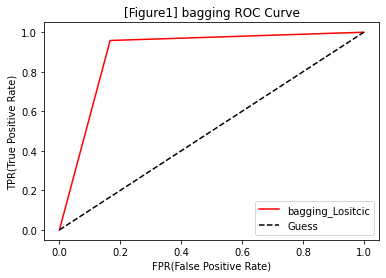

In [188]:
# ROC 커브
y_score = model_ada.predict( x_test )
fpr, tpr, thresholds = metrics.roc_curve( y_test,  # 실제 y값
                                          y_score  # 확률값
                                        ) 

plt.plot( fpr, tpr , 'r-')
plt.plot( [0,1],[0,1], 'k--' ) # 이 선을 기준으로 왼쪽 위로 갈 수록 좋은 진단

plt.title('[Figure1] bagging ROC Curve')
plt.xlabel('FPR(False Positive Rate)')
plt.ylabel('TPR(True Positive Rate)')
plt.legend( ['bagging_Lositcic','Guess'] )

plt.show()

#### Voting 적용

In [194]:
models = [('ada', AdaBoostClassifier()),
         ('bc', BaggingClassifier()),
         ('logi', LogisticRegression()),
         ('tree', DecisionTreeClassifier()),
         ('knn', KNeighborsClassifier())]

model_vote = VotingClassifier(models, voting='soft')
model_vote.fit(x_train, y_train)

VotingClassifier(estimators=[('ada',
                              AdaBoostClassifier(algorithm='SAMME.R',
                                                 base_estimator=None,
                                                 learning_rate=1.0,
                                                 n_estimators=50,
                                                 random_state=None)),
                             ('bc',
                              BaggingClassifier(base_estimator=None,
                                                bootstrap=True,
                                                bootstrap_features=False,
                                                max_features=1.0,
                                                max_samples=1.0,
                                                n_estimators=10, n_jobs=None,
                                                oob_score=False,
                                                random_state=None, verbose=0,
                        

In [195]:
model_vote.score(x_test, y_test)

0.9473684210526315